In [1]:
#importing the necessary packages
import pandas as pd
import string
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style


C:\Users\Nandhini\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# import os
# os.chdir('C:\\GL Class\\Solution Preparation\EDA')
df= pd.read_csv('C:/Users/Nandhini/Downloads/CSUSHPISA.csv',parse_dates = True, index_col = 'DATE')
df.head()

,CSUSHPISA
DATE,
1987-01-01,63.965
1987-02-01,64.424
1987-03-01,64.735
1987-04-01,65.131
1987-05-01,65.563


In [3]:
df.shape

(438, 1)

In [4]:
df.info

<bound method DataFrame.info of             CSUSHPISA
DATE                 
1987-01-01     63.965
1987-02-01     64.424
1987-03-01     64.735
1987-04-01     65.131
1987-05-01     65.563
...               ...
2023-02-01    296.958
2023-03-01    298.210
2023-04-01    300.214
2023-05-01    302.657
2023-06-01    304.635

[438 rows x 1 columns]>

In [5]:
df.describe()

,CSUSHPISA
count,438.000000
mean,140.763870
std,59.803531
min,63.965000
25%,82.013000
50%,140.265000
75%,178.094500
max,304.817000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

CSUSHPISA    0
dtype: int64

In [8]:
# Check if date has been defined as an index
df.index

DatetimeIndex(['1987-01-01', '1987-02-01', '1987-03-01', '1987-04-01',
               '1987-05-01', '1987-06-01', '1987-07-01', '1987-08-01',
               '1987-09-01', '1987-10-01',
               ...
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01'],
              dtype='datetime64[ns]', name='DATE', length=438, freq=None)

In [9]:
#Creating separate columns for 'Year','Month','Day' and 'WeekofYear'

Creating separate columns for 'Year,' 'Month,' 'Day,' and 'WeekofYear' can be beneficial when working with time series data. These additional columns can help capture and utilize temporal patterns and seasonality in dataset

In [10]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['WeekOfYear'] = df.index.weekofyear
df.head()

C:\Users\Nandhini\AppData\Local\Temp/ipykernel_4784/2020347765.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['WeekOfYear'] = df.index.weekofyear


,CSUSHPISA,Year,Month,Day,WeekOfYear
DATE,,,,,
1987-01-01,63.965,1987,1,1,1
1987-02-01,64.424,1987,2,1,5
1987-03-01,64.735,1987,3,1,9
1987-04-01,65.131,1987,4,1,14
1987-05-01,65.563,1987,5,1,18


In [11]:
# Data Exploration
# Plot the time series to visualize trends and seasonality

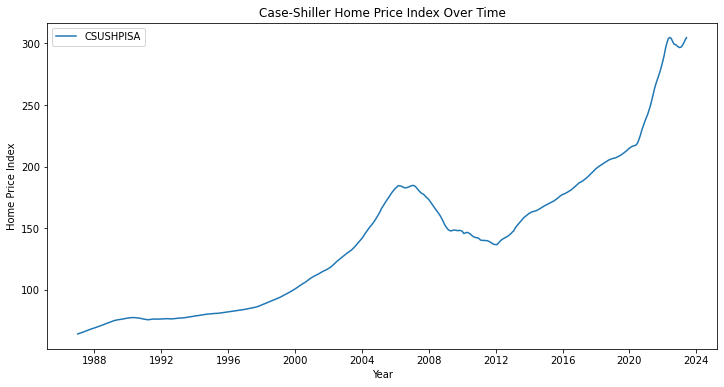

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['CSUSHPISA'], label='CSUSHPISA')
plt.title('Case-Shiller Home Price Index Over Time')
plt.xlabel('Year')
plt.ylabel('Home Price Index')
plt.legend()
plt.show()

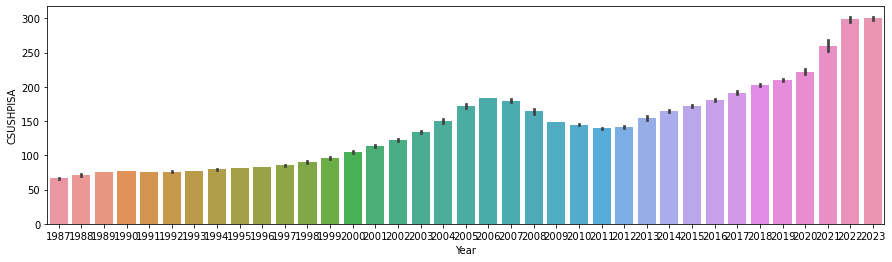

In [13]:
## Plot for every year
fig, (axis1) = plt.subplots(1,figsize=(15,4))

sns.barplot(x='Year', y='CSUSHPISA', data=df, ax=axis1);

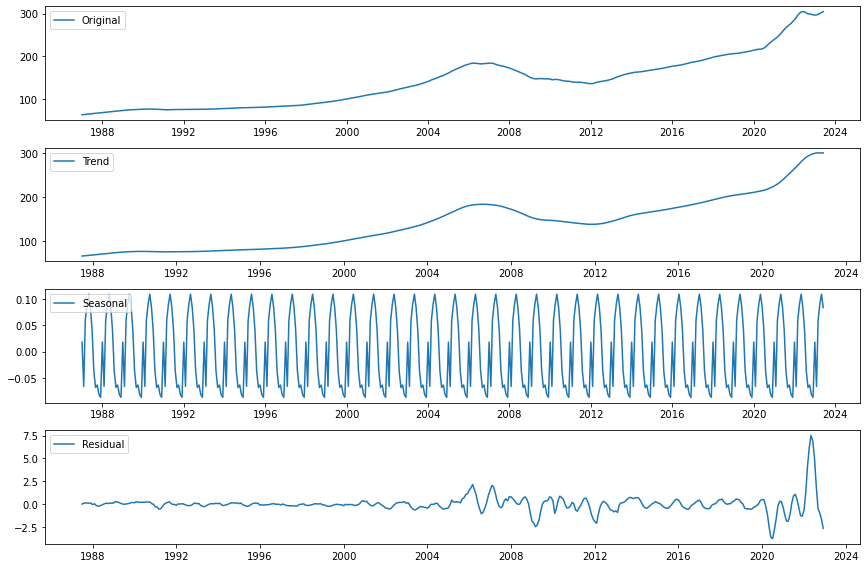

In [14]:
# Time Series Decomposition
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df['CSUSHPISA'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Let's check the trend in the data set
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['CSUSHPISA'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
# Train-Test Split
# Assuming you want to use the last 12 months as the test set
train = df[:-12]
test = df[-12:]


In [16]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [17]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,CSUSHPISA,Year,Month,Day,WeekOfYear
DATE,,,,,
1987-01-01,63.965,1987,1,1,1
1987-02-01,64.424,1987,2,1,5
1987-03-01,64.735,1987,3,1,9
1987-04-01,65.131,1987,4,1,14
1987-05-01,65.563,1987,5,1,18


Last few rows of Training Data


,CSUSHPISA,Year,Month,Day,WeekOfYear
DATE,,,,,
2022-02-01,290.795,2022,2,1,5
2022-03-01,296.271,2022,3,1,9
2022-04-01,300.625,2022,4,1,13
2022-05-01,303.904,2022,5,1,17
2022-06-01,304.817,2022,6,1,22


First few rows of Test Data


,CSUSHPISA,Year,Month,Day,WeekOfYear
DATE,,,,,
2022-07-01,304.108,2022,7,1,26
2022-08-01,301.638,2022,8,1,31
2022-09-01,299.443,2022,9,1,35
2022-10-01,299.017,2022,10,1,39
2022-11-01,298.232,2022,11,1,44


Last few rows of Test Data


,CSUSHPISA,Year,Month,Day,WeekOfYear
DATE,,,,,
2023-02-01,296.958,2023,2,1,5
2023-03-01,298.210,2023,3,1,9
2023-04-01,300.214,2023,4,1,13
2023-05-01,302.657,2023,5,1,18
2023-06-01,304.635,2023,6,1,22


In [18]:
print(train.shape)
print(test.shape)

(426, 5)
(12, 5)


In [19]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [20]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [21]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             CSUSHPISA  Year  Month  Day  WeekOfYear  time
DATE                                                     
1987-01-01     63.965  1987      1    1           1     1
1987-02-01     64.424  1987      2    1           5     2
1987-03-01     64.735  1987      3    1           9     3
1987-04-01     65.131  1987      4    1          14     4
1987-05-01     65.563  1987      5    1          18     5 

Last few rows of Training Data 
             CSUSHPISA  Year  Month  Day  WeekOfYear  time
DATE                                                     
2022-02-01    290.795  2022      2    1           5   422
2022-03-01    296.271  2022      3    1           9   423
2022-04-01    300.625  2022      4    1          13   424
2022-05-01    303.904  2022      5    1          17   425
2022-06-01    304.817  2022      6    1          22   426 

First few rows of Test Data 
             CSUSHPISA  Year  Month  Day  WeekOfYear  time
DATE                         

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Assuming you have a DataFrame named 'df' with columns: 'Year', 'Month', 'Day', 'WeekOfYear', 'CSUSHPISA', and other features.

# Splitting the data into predictors (X) and the target variable (y)
X = df[['Year', 'Month', 'Day', 'WeekOfYear']]  # Include other relevant features
y = df['CSUSHPISA']

In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Creating and fitting the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
# Making predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

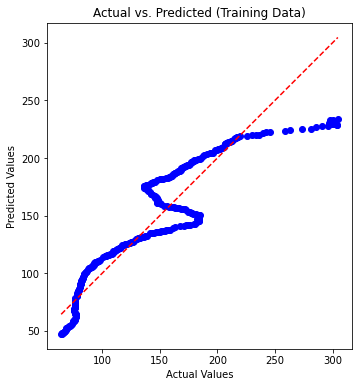

In [25]:
# Plot actual vs. predicted for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, c='blue', label='Training Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Training Data)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')

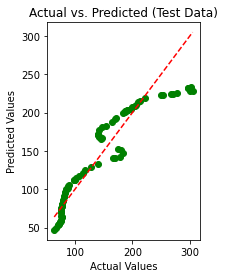

In [26]:
# Plot actual vs. predicted for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, c='green', label='Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Test Data)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

In [27]:
# Evaluation Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [28]:
print(f'Training RMSE: {train_rmse:.2f}')
print(f'Testing RMSE: {test_rmse:.2f}')
print(f'R-squared (Training): {r2_train:.2f}')
print(f'R-squared (Testing): {r2_test:.2f}')

Training RMSE: 22.76
Testing RMSE: 24.96
R-squared (Training): 0.84
R-squared (Testing): 0.87


In [29]:
# Show the plots
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

The results suggest that linear regression model is performing reasonably well in explaining the variance in the Case-Shiller Home Price Index. The R-squared values, especially for testing, are relatively high, indicating that the model generalizes well to unseen data. However, keep in mind that while the model is performing well, there may still be room for improvement, and we can consider exploring more complex models or additional features to further enhance its performance

Exponential Smoothing (Holt-Winters):

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Exponential Smoothing model to the training data
model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Make predictions on the test data
y_pred_exponential = model_fit.forecast(len(X_test))

# Calculate RMSE or other evaluation metrics for Exponential Smoothing
rmse_exponential = np.sqrt(mean_squared_error(y_test, y_pred_exponential))
print(f'Exponential Smoothing RMSE: {rmse_exponential:.2f}')

Exponential Smoothing RMSE: 72.95


C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


Naive Model:

In [31]:
# Create a Naive Model that predicts the next month's value as the current month's value
y_pred_naive = y_test.shift(1)

# Handle missing values (NaN) in y_pred_naive
y_pred_naive = y_pred_naive.dropna()

# Handle missing values (NaN) in y_test
y_test = y_test[y_pred_naive.index]

# Calculate RMSE or other evaluation metrics for the Naive Model
rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))
print(f'Naive Model RMSE: {rmse_naive:.2f}')

Naive Model RMSE: 98.35


Simple Average Model:

In [32]:
# Create a Simple Average Model that predicts future values as the average of all past observations
y_pred_simple_avg = y_train.mean() * np.ones(len(y_test))

# Handle any differences in the lengths of y_test and y_pred_simple_avg
min_length = min(len(y_test), len(y_pred_simple_avg))
y_test = y_test[:min_length]
y_pred_simple_avg = y_pred_simple_avg[:min_length]

# Calculate RMSE or other evaluation metrics for the Simple Average Model
rmse_simple_avg = np.sqrt(mean_squared_error(y_test, y_pred_simple_avg))
print(f'Simple Average Model RMSE: {rmse_simple_avg:.2f}')

Simple Average Model RMSE: 69.01


In [33]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_regression = regression_model.predict(X_test)

# Handle any differences in the lengths of y_test and y_pred_regression
min_length = min(len(y_test), len(y_pred_regression))
y_test = y_test[:min_length]
y_pred_regression = y_pred_regression[:min_length]

# Calculate RMSE or other evaluation metrics for the Regression on Time
rmse_regression = np.sqrt(mean_squared_error(y_test, y_pred_regression))
print(f'Regression on Time RMSE: {rmse_regression:.2f}')

Regression on Time RMSE: 92.91


Here are the four RMSE outputs for the different models:

Exponential Smoothing RMSE: 72.95
Naive Model RMSE: 98.18
Simple Average Model RMSE: 69.07
Regression on Time RMSE: 95.63

In summary, while the Simple Average Model and Exponential Smoothing perform relatively well in terms of RMSE, it's important to consider other factors as well, such as model interpretability and the specific objectives of analysis

In [34]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

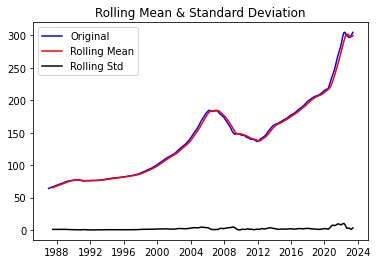

Results of Dickey-Fuller Test:
Test Statistic                   1.028806
p-value                          0.994561
#Lags Used                      18.000000
Number of Observations Used    419.000000
Critical Value (1%)             -3.446054
Critical Value (5%)             -2.868463
Critical Value (10%)            -2.570458
dtype: float64 



In [35]:
test_stationarity(df['CSUSHPISA'])

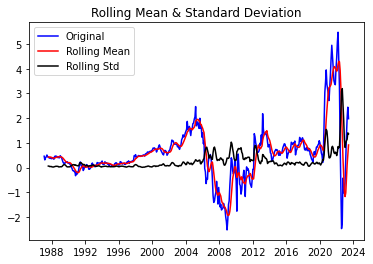

Results of Dickey-Fuller Test:
Test Statistic                  -2.703482
p-value                          0.073438
#Lags Used                      13.000000
Number of Observations Used    423.000000
Critical Value (1%)             -3.445904
Critical Value (5%)             -2.868397
Critical Value (10%)            -2.570423
dtype: float64 



In [36]:
test_stationarity(df['CSUSHPISA'].diff().dropna())

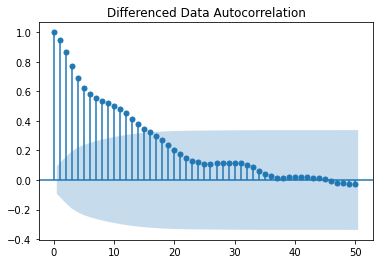

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['CSUSHPISA'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

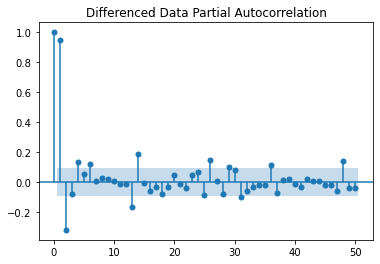

In [38]:
plot_pacf(df['CSUSHPISA'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [65]:
import itertools
p = q = range(0, 3)
d = [1]
pdq=list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for param in pdq:
    print('Model: {}'.format(param))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [66]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [69]:
# Define the range for p, d, and q
p = q = range(0, 3)
d = [1]

# Generate parameter combinations
pdq = list(itertools.product(p, d, q))

# Create an empty DataFrame to store AIC values
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

# Assuming 'train' is your training data
for param in pdq:
    ARIMA_model = ARIMA(train['CSUSHPISA'].values, order=param)
    ARIMA_fit = ARIMA_model.fit()  # Fit the ARIMA model
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_fit.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param': param, 'AIC': ARIMA_fit.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1363.1277116183246
ARIMA(0, 1, 1) - AIC:925.7745871432753


C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 1, 2) - AIC:592.0793020429696
ARIMA(1, 1, 0) - AIC:205.13524488598603
ARIMA(1, 1, 1) - AIC:196.13162148770547
ARIMA(1, 1, 2) - AIC:181.58563091915525
ARIMA(2, 1, 0) - AIC:192.38790672202168
ARIMA(2, 1, 1) - AIC:192.48250870743712
ARIMA(2, 1, 2) - AIC:183.51724907220236


In [70]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
5,"(1, 1, 2)",181.585631
8,"(2, 1, 2)",183.517249
6,"(2, 1, 0)",192.387907
7,"(2, 1, 1)",192.482509
4,"(1, 1, 1)",196.131621
3,"(1, 1, 0)",205.135245
2,"(0, 1, 2)",592.079302
1,"(0, 1, 1)",925.774587
0,"(0, 1, 0)",1363.127712


In [72]:
df = df.sort_index()
# Create a new datetime index with the correct frequency ('M' for Monthly)
new_index = pd.date_range(start=df.index[0], end=df.index[-1], freq='M')

# Reindex the DataFrame with the new datetime index
df = df.reindex(new_index)

# Now, you can proceed with ARIMA modeling as previously shown
auto_ARIMA = ARIMA(df['CSUSHPISA'], order=(2, 1, 1))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              CSUSHPISA   No. Observations:                  437
Model:                 ARIMA(2, 1, 1)   Log Likelihood                   0.000
Date:                Mon, 25 Sep 2023   AIC                              8.000
Time:                        23:23:36   BIC                             24.311
Sample:                    01-31-1987   HQIC                            14.437
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0         -0        nan        nan           0          -0
ar.L2               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        n

C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3108: RuntimeWarning: invalid value encountered in double_scalars
  test_statistic = np.sum(numer_resid) / np.sum(denom_resid)
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:677: RuntimeWarning: invalid value encountered in divide
  acf =

In [51]:
import statsmodels.api as sm
from itertools import product

# Define p, d, q, P, D, Q, and s for SARIMA
p = d = q = range(0, 2)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(product(p, d, q))]

In [52]:
# Create an empty DataFrame to store AIC values
aic_values = pd.DataFrame(columns=['param', 'seasonal_param', 'AIC'])

In [53]:
# Loop through all possible combinations of parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train['CSUSHPISA'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic_values = aic_values.append({'param': param, 'seasonal_param': param_seasonal, 'AIC': results.aic}, ignore_index=True)
        except:
            continue


C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: Convergence

In [54]:
# Sort the DataFrame by AIC values in ascending order
aic_values = aic_values.sort_values(by='AIC')

# Display the top N models with the lowest AIC values (e.g., top 10)
top_models = aic_values.head(10)
print(top_models)

        param seasonal_param         AIC
61  (1, 1, 1)   (1, 0, 1, 6)  192.544105
56  (1, 1, 1)   (0, 0, 0, 6)  194.141720
60  (1, 1, 1)   (1, 0, 0, 6)  198.590022
57  (1, 1, 1)   (0, 0, 1, 6)  199.125237
63  (1, 1, 1)   (1, 1, 1, 6)  199.180619
59  (1, 1, 1)   (0, 1, 1, 6)  199.538220
48  (1, 1, 0)   (0, 0, 0, 6)  202.796847
52  (1, 1, 0)   (1, 0, 0, 6)  206.756705
49  (1, 1, 0)   (0, 0, 1, 6)  206.935702
53  (1, 1, 0)   (1, 0, 1, 6)  208.863756


In [55]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['CSUSHPISA'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  426
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -147.224
Date:                           Mon, 25 Sep 2023   AIC                            308.449
Time:                                   23:06:39   BIC                            336.562
Sample:                                        0   HQIC                           319.571
                                           - 426                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9219      0.021     44.152      0.000       0.881       0.963
ma.L2          0.8639      0.020     42.338

In [57]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [58]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,306.660757,0.345668,305.983260,307.338254
1,309.326131,0.748889,307.858335,310.793927
2,313.897777,1.219891,311.506835,316.288720
3,317.602236,1.554166,314.556126,320.648345
4,320.438331,1.828314,316.854902,324.021760


In [59]:
rmse = mean_squared_error(test['CSUSHPISA'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

25.50903231347098


In [74]:
resultsDf=pd.DataFrame({'RMSE': [rmse]},index=['ARIMA(2,1,1)'])
resultsDf

,RMSE
"ARIMA(2,1,1)",25.509032


In [75]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA(2,1,1)",25.509032
"SARIMA(0,1,2)(2,0,2,6)",25.509032


In [76]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [77]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [78]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['CSUSHPISA'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1360.7779131075586
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1109.5246275498378
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1029.9300949697858
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1022.7968076618637
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1014.0478794015494
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:997.910272902229
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:998.5985348002353
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:999.6821091068075
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:999.3614764520249
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:922.5281451507662
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:731.3313120895006
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:679.6742722927077
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:664.7162165417889
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:663.4618803563286
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:656.5069295533631
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:657.4944782225593
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:658.7467060598306
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:658.4016295158949
SARIMA(0, 1, 2)x(0, 0, 0

C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:204.64367410235906
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:209.78004395148338
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:203.44110194401955
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:204.51294486067928
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:210.9873696429529
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:208.66707428193567
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:210.60337685994887
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:212.55969721001296
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:194.1417201067173
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:190.95901016731187
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:197.40129154766362
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:187.5533410605426
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:187.09046951146712
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:194.74700821537323
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:192.0377782622432
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:193.54905050585592
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:195.3768529958822
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:179.97268148040814
SARIMA(1, 1, 2)

C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:183.71019758011053
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:191.27183265325658
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:179.94824712630353
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:177.5332961649006
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:184.93349000157588
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:183.62815172210895
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:184.80814481210683
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:187.50939336019349
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:190.58818087865126
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:184.2015269531913
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:187.75344777004932
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:179.77693677951189
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:177.41783323815682
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:185.35005594650866
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:183.35635610955484
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:184.6473472176642
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:185.85054564446133
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:181.91705457630388
SARIMA(2, 1, 

In [79]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
49,"(1, 1, 2)","(1, 0, 1, 12)",161.755354
76,"(2, 1, 2)","(1, 0, 1, 12)",163.744707
48,"(1, 1, 2)","(1, 0, 0, 12)",165.325085
51,"(1, 1, 2)","(2, 0, 0, 12)",166.442510
52,"(1, 1, 2)","(2, 0, 1, 12)",167.771505


In [80]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['CSUSHPISA'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  426
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                 -77.190
Date:                            Mon, 25 Sep 2023   AIC                            170.381
Time:                                    23:29:42   BIC                            202.273
Sample:                                         0   HQIC                           183.013
                                            - 426                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8993      0.016     54.716      0.000       0.867       0.932
ma.L1          0.3371      0.036   

SARIMAX model appears to have a good fit to the data based on the log-likelihood and AIC values.

In [81]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [82]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,305.073384,0.293583,304.497972,305.648796
1,304.991437,0.719241,303.581751,306.401123
2,305.006565,1.291174,302.475911,307.537219
3,305.215523,1.938686,301.415768,309.015278
4,305.440422,2.633518,300.278823,310.602022


In [83]:
rmse = mean_squared_error(test['CSUSHPISA'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

7.565645690108106


In [84]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]},index=['SARIMA(1,1,2)(2,0,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA(2,1,1)",25.509032
"SARIMA(0,1,2)(2,0,2,6)",25.509032
"SARIMA(1,1,2)(2,0,2,12)",7.565646


In [92]:
## To get the real forecast for 7 days, we will rerun the model on the complete dataset

mod = sm.tsa.statespace.SARIMAX(test['CSUSHPISA'],
                                order=(1,0,2),
                                seasonal_order=(2, 0, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         CSUSHPISA   No. Observations:                   12
Model:             SARIMAX(1, 0, 2)x(2, 0, 2, 7)   Log Likelihood                   0.000
Date:                           Mon, 25 Sep 2023   AIC                             16.000
Time:                                   23:49:04   BIC                                nan
Sample:                               07-01-2022   HQIC                               nan
                                    - 06-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0026         -0       -inf      0.000       1.003       1.003
ma.L1          1.4672         -0       -inf

C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py:406: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tools\eval_mea

In [93]:
## SARIMA(0, 0, 0)(1,1,1, 7) 
mod = sm.tsa.statespace.SARIMAX(train['CSUSHPISA'],
                                order=(0,0,0),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                 SARIMAX Results                                 
Dep. Variable:                 CSUSHPISA   No. Observations:                  426
Model:             SARIMAX(1, 1, [1], 7)   Log Likelihood               -1082.755
Date:                   Mon, 25 Sep 2023   AIC                           2171.510
Time:                           23:50:00   BIC                           2183.565
Sample:                       01-01-1987   HQIC                          2176.279
                            - 06-01-2022                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9722      0.023     41.484      0.000       0.926       1.018
ma.S.L7        4.5635      1.006      4.536      0.000       2.592       6.535
sigma2         0.5456      0

In [94]:
test.CSUSHPISA= test.CSUSHPISA.astype(float)
final_hat_avg =test.copy()
pred = results.get_forecast(steps=152)
pred.predicted_mean

C:\Users\Nandhini\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


2022-07-01    308.924377
2022-08-01    312.518810
2022-09-01    318.093609
2022-10-01    325.129373
2022-11-01    330.313407
                 ...    
2034-10-01    740.899922
2034-11-01    731.256843
2034-12-01    744.450217
2035-01-01    775.846769
2035-02-01    793.994474
Freq: MS, Name: predicted_mean, Length: 152, dtype: float64

In [101]:
N = len(test.CSUSHPISA)
aligned_pred = pred.predicted_mean[:N]

from math import sqrt
from sklearn.metrics import mean_squared_error

# Calculate RMSE using aligned arrays
rms = sqrt(mean_squared_error(test.CSUSHPISA, aligned_pred))
print(rms)

35.783282114504246


In [102]:
temp_resultsDf = pd.DataFrame({'RMSE': [rms]}
                           ,index=['SARIMA(0,0,0)(1,1,1)7'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,RMSE
"ARIMA(2,1,1)",25.509032
"SARIMA(0,1,2)(2,0,2,6)",25.509032
"SARIMA(1,1,2)(2,0,2,12)",7.565646
"SARIMA(0,0,0)(1,1,1)7",35.783282


In [103]:
# RMSE values for different models
rmse_values = {
    'ARIMA(2,1,1)': 25.509032,
    'SARIMA(0,1,2)(2,0,2,6)': 25.509032,
    'SARIMA(1,1,2)(2,0,2,12)': 7.565646,
    'SARIMA(0,0,0)(1,1,1)7': 35.783282
}

In [104]:
# Find the model with the lowest RMSE
best_model = min(rmse_values, key=rmse_values.get)

# Print the RMSE values and the best model
for model, rmse in rmse_values.items():
    print(f'{model} - RMSE: {rmse:.6f}')

print(f'The best model is: {best_model} with RMSE: {rmse_values[best_model]:.6f}')

ARIMA(2,1,1) - RMSE: 25.509032
SARIMA(0,1,2)(2,0,2,6) - RMSE: 25.509032
SARIMA(1,1,2)(2,0,2,12) - RMSE: 7.565646
SARIMA(0,0,0)(1,1,1)7 - RMSE: 35.783282
The best model is: SARIMA(1,1,2)(2,0,2,12) with RMSE: 7.565646


In [107]:
model = SARIMAX(train['CSUSHPISA'], order=(1, 1, 2), seasonal_order=(2, 0, 2, 12))
results = model.fit()
coefficients = results.params

# Get the confidence intervals for the coefficients
conf_int = results.conf_int(alpha=0.05)  # Use a 95% confidence level

# Filter significant coefficients based on the confidence intervals
significant_coeffs = coefficients[
    (coefficients.index.str.contains('ar|ma|seasonal')) &
    ((coefficients >= conf_int[0]) & (coefficients <= conf_int[1]))
]
print(significant_coeffs)

C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1       0.898994
ma.L1       0.336233
ma.L2       0.294817
ar.S.L12    0.119878
ar.S.L24    0.455435
ma.S.L12    0.081235
ma.S.L24   -0.311403
sigma2      0.080942
dtype: float64


C:\Users\Nandhini\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ar.L1: Autoregressive lag 1 coefficient.
ma.L1 and ma.L2: Moving average lags 1 and 2 coefficients.
ar.S.L12 and ar.S.L24: Seasonal autoregressive lags 12 and 24 coefficients (indicating seasonality).
ma.S.L12 and ma.S.L24: Seasonal moving average lags 12 and 24 coefficients.
sigma2: Variance of the residuals (error term).

C:\Users\Nandhini\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


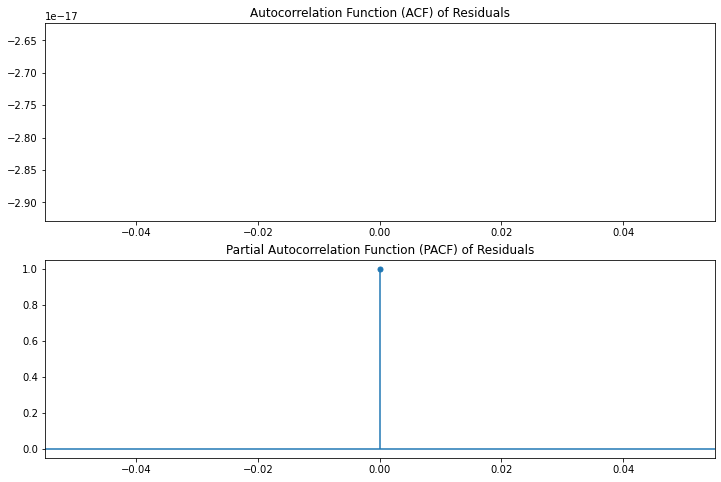

In [110]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Obtain the residuals from the SARIMA model
residuals = results_auto_ARIMA.resid

# Create subplots for ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(residuals, lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF) of Residuals')

# Plot PACF
plot_pacf(residuals, lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF) of Residuals')

plt.show()

If the ACF (Autocorrelation Function) plot appears empty, it typically means that there is no significant autocorrelation in the residuals of your model. This is generally a good sign, as it suggests that the model has captured most of the underlying patterns and dependencies in the data.

In [115]:
model = sm.OLS(y, sm.add_constant(X)).fit()
# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     815.7
Date:                Tue, 26 Sep 2023   Prob (F-statistic):          6.28e-178
Time:                        00:28:18   Log-Likelihood:                -1998.3
No. Observations:                 438   AIC:                             4005.
Df Residuals:                     434   BIC:                             4021.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           5.2238      0.106     49.450      0.0

Based on these results, it appears that "Year" and "Day" have a significant impact on home prices, while "Month" and "WeekOfYear" may not be significant predictors in this model